In [ ]:

import pandas as pd 
import numpy as np 
from tensorflow.keras import Sequential #This is for stacking the layers 
from tensorflow.keras.layers import Dense, Dropout 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics.pairwise import kernel_metrics
from tensorflow.keras.callbacks import ModelCheckpoint 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix 
import seaborn as sns
from tensorflow.keras.optimizers import Adam

In [ ]:
path = "/content/drive/MyDrive/project/telecom_churn.csv"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(path)
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [ ]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [ ]:
df["Churn"].nunique()
df.duplicated().sum()

0

In [ ]:
for i in df.columns:
  
  print(  i + " has " +  str(df[i].nunique()) + " unique values which are: " + str(df[i].unique()) )
  print (round(df[i].value_counts(normalize = True) * 100, 2 ).map(str) +'%')
  print ("\n")
  print("-------------------------------------")
  

Churn has 2 unique values which are: [0 1]
0    85.51%
1    14.49%
Name: Churn, dtype: object


-------------------------------------
AccountWeeks has 212 unique values which are: [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243  23   1 205
 200   5   9 178 181 182 217 177 210  29 180   2  17   7 212 232 192 195
 197 225 184 191 

In [ ]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [ ]:
# select features and Target 
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [ ]:
# Split the Dataset into train and test 
x_train, x_test, y_train, y_test = train_test_split ( X, y, test_size = 0.2, random_state = 0, stratify = y )

In [ ]:
# normalize the Data 
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [ ]:
x_train.shape

(2666, 10)

In [ ]:
# y_train & y_test to categorical 
y_tr = to_categorical(y_train)
y_te = to_categorical(y_test)
y_tr

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)


 NOTE 
 
 y_train & y_test to be in array; either use .value after feature split for both the X and y, 
But recall during normalization this would have been effected for the x_train and x_test. So here, you can use the Keras approach to covert to categorical in an array format as output 

In [ ]:
n_class = len (np.unique(y) )
n_class

2

In [ ]:
# Model Architecture 

# model = Sequential()
# model.add(Dense(128, input_dim = x_train.shape[1],  activation = 'relu'))
# model.add(Dense(10, activation= 'relu'))
# model.add(Dense(n_class, activation = 'sigmoid'))

In [ ]:
# Model Architecture 

model = Sequential()

# Input layer 
model.add(Dense(128, input_shape = (x_train.shape[1],),  activation = 'relu'))

# Hidden layer 
model.add(Dense(10, activation= 'relu'))

# Output layer 
model.add(Dense(n_class, activation = 'sigmoid'))

In [ ]:
# Print Model summary 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
Total params: 2,720
Trainable params: 2,720
Non-trainable params: 0
_________________________________________________________________


Deduction 
We have got 2,720 trainable parameters  

In [ ]:
# compile 
opt = Adam( )
model.compile (loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'] ) 

In [ ]:
# Train the network
r = model.fit ( x_train_sc, y_tr, batch_size= 32, epochs = 10, validation_split = 0.2, verbose =2)

Epoch 1/10
67/67 - 2s - loss: 0.5867 - accuracy: 0.7505 - val_loss: 0.4229 - val_accuracy: 0.8633 - 2s/epoch - 30ms/step
Epoch 2/10
67/67 - 0s - loss: 0.3805 - accuracy: 0.8588 - val_loss: 0.3304 - val_accuracy: 0.8745 - 210ms/epoch - 3ms/step
Epoch 3/10
67/67 - 0s - loss: 0.3215 - accuracy: 0.8743 - val_loss: 0.2983 - val_accuracy: 0.8858 - 192ms/epoch - 3ms/step
Epoch 4/10
67/67 - 0s - loss: 0.2926 - accuracy: 0.8818 - val_loss: 0.2794 - val_accuracy: 0.8914 - 160ms/epoch - 2ms/step
Epoch 5/10
67/67 - 0s - loss: 0.2739 - accuracy: 0.8898 - val_loss: 0.2671 - val_accuracy: 0.8951 - 235ms/epoch - 4ms/step
Epoch 6/10
67/67 - 0s - loss: 0.2594 - accuracy: 0.8954 - val_loss: 0.2579 - val_accuracy: 0.8914 - 262ms/epoch - 4ms/step
Epoch 7/10
67/67 - 0s - loss: 0.2498 - accuracy: 0.9001 - val_loss: 0.2532 - val_accuracy: 0.8951 - 154ms/epoch - 2ms/step
Epoch 8/10
67/67 - 0s - loss: 0.2443 - accuracy: 0.9015 - val_loss: 0.2484 - val_accuracy: 0.9026 - 490ms/epoch - 7ms/step
Epoch 9/10
67/67 -

In [ ]:
model.history.history

{'loss': [0.5866907835006714,
  0.38050246238708496,
  0.3214605152606964,
  0.2925730049610138,
  0.2738761305809021,
  0.25942495465278625,
  0.2498047798871994,
  0.24429796636104584,
  0.23656129837036133,
  0.2356712371110916],
 'accuracy': [0.7504690289497375,
  0.858817994594574,
  0.8742964267730713,
  0.8818011283874512,
  0.8897748589515686,
  0.8954033851623535,
  0.9000937938690186,
  0.901500940322876,
  0.903377115726471,
  0.9029080867767334],
 'val_loss': [0.4229150712490082,
  0.3304109573364258,
  0.2982673943042755,
  0.279379665851593,
  0.2670538127422333,
  0.2578589916229248,
  0.253191202878952,
  0.24839620292186737,
  0.25225597620010376,
  0.248069167137146],
 'val_accuracy': [0.86329585313797,
  0.8745318055152893,
  0.8857678174972534,
  0.8913857936859131,
  0.8951311111450195,
  0.8913857936859131,
  0.8951311111450195,
  0.9026217460632324,
  0.8951311111450195,
  0.898876428604126]}

In [ ]:
score = pd.DataFrame(model.history.history)
score

,loss,accuracy,val_loss,val_accuracy
0,0.586691,0.750469,0.422915,0.863296
1,0.380502,0.858818,0.330411,0.874532
2,0.321461,0.874296,0.298267,0.885768
3,0.292573,0.881801,0.279380,0.891386
4,0.273876,0.889775,0.267054,0.895131
5,0.259425,0.895403,0.257859,0.891386
6,0.249805,0.900094,0.253191,0.895131
7,0.244298,0.901501,0.248396,0.902622
8,0.236561,0.903377,0.252256,0.895131
9,0.235671,0.902908,0.248069,0.898876



 It is clear that accuracy is a good metric for classification problem with accuracy score of 84% which is best on te training set and with val_accuracy oof 88% 

In [ ]:
# score.plot()

In [ ]:
acc = r.history["accuracy"]
acc

[0.7504690289497375,
 0.858817994594574,
 0.8742964267730713,
 0.8818011283874512,
 0.8897748589515686,
 0.8954033851623535,
 0.9000937938690186,
 0.901500940322876,
 0.903377115726471,
 0.9029080867767334]

In [ ]:
training_loss = r.history["loss"]
training_loss

[0.5866907835006714,
 0.38050246238708496,
 0.3214605152606964,
 0.2925730049610138,
 0.2738761305809021,
 0.25942495465278625,
 0.2498047798871994,
 0.24429796636104584,
 0.23656129837036133,
 0.2356712371110916]

In [ ]:
val_loss = r.history["val_loss"]
val_loss

[0.4229150712490082,
 0.3304109573364258,
 0.2982673943042755,
 0.279379665851593,
 0.2670538127422333,
 0.2578589916229248,
 0.253191202878952,
 0.24839620292186737,
 0.25225597620010376,
 0.248069167137146]

In [ ]:
val_acc = r.history["val_accuracy"]
val_acc

[0.86329585313797,
 0.8745318055152893,
 0.8857678174972534,
 0.8913857936859131,
 0.8951311111450195,
 0.8913857936859131,
 0.8951311111450195,
 0.9026217460632324,
 0.8951311111450195,
 0.898876428604126]

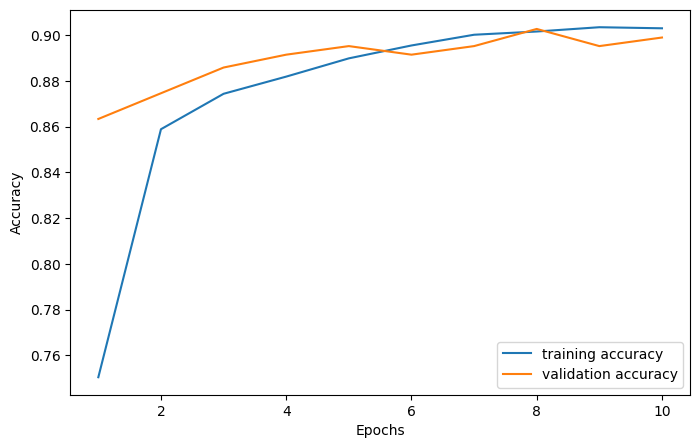

In [ ]:
val_acc = r.history["val_accuracy"]
acc = r.history["accuracy"]
epochs = range(1, len(acc) + 1) 
# epochs = range (1,10)
plt.figure(figsize = (8,5))
plt.plot(epochs, acc, label = "training accuracy")
plt.plot(epochs, val_acc, label = "validation accuracy")
plt.legend( loc ="best") # this is to place the plot label at best position 
plt.xlabel ("Epochs")
plt.ylabel("Accuracy")
plt.show() 


Deduction 

It can be seen that the model performs well on the training and accuracy with an average accuracy score of 91% 

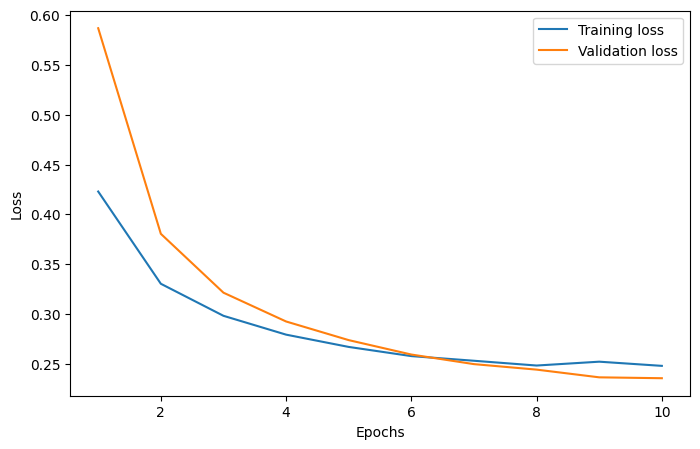

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(epochs,val_loss, label = "Training loss")
plt.plot (epochs, training_loss, label = "Validation loss" )
plt.legend(loc="best")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Deduction 

Its clear on performance as the loss on both training and validation dropped 

In [ ]:
# Evaluation 

In [ ]:
# y_pred = model.predict(x_test_sc)[:, 1]

In [ ]:
y_pred = model.predict(x_test_sc).argmax(axis = 1)
cm = confusion_matrix( y_test, y_pred)
cm

21/21 [==============================] - 0s 990us/step


array([[561,   9],
       [ 56,  41]])

21/21 [==============================] - 0s 2ms/step
Test Accuracy: 0.903
Precision: 0.82
Recall: 0.423
F1 Score: 0.558


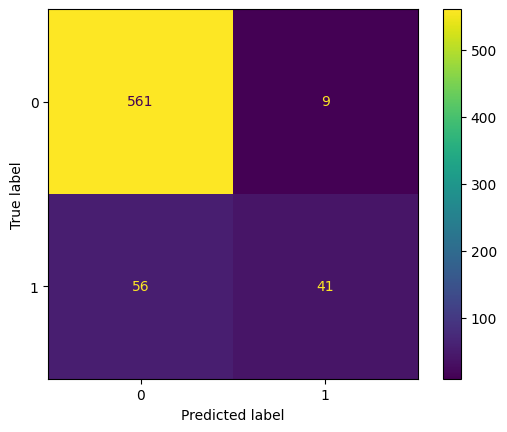

In [ ]:
# import relevant libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # to plot the confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(x_test_sc).argmax(axis = 1) # getting the index of the row with the maximum prediction
accuracy = accuracy_score(y_test, y_pred) # computing the test accuracy
precision = precision_score(y_test, y_pred) # computing the precision
recall = recall_score(y_test, y_pred) # computing the recall
f1 = f1_score(y_test, y_pred) # computing the f1

# printing the metrics
print(f'Test Accuracy: {round(accuracy, 3)}') # printing test accuracy to 3 decimal places
print(f'Precision: {round(precision, 3)}') # printing precision to 3 decimal places
print(f'Recall: {round(recall, 3)}') # printing recall to 3 decimal places
print(f'F1 Score: {round(f1, 3)}') # printing f1 score to 3 decimal places

cm = confusion_matrix(y_test, y_pred, labels = [0, 1])
display = ConfusionMatrixDisplay(cm, display_labels=[0, 1]) # setting the display 
display.plot() # plotting the confusion matrix
plt.show()